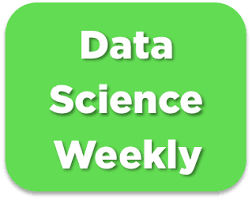

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
!pip install plotly -q

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, r2_score

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [3]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

In [5]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [6]:
data.country.value_counts()*100/data.country.value_counts().sum()

US         56.266779
China      24.289128
UK         15.335231
Germany     4.108862
Name: country, dtype: float64

In [7]:
data.new_user.value_counts()*100/data.country.value_counts().sum()

1    68.545225
0    31.454775
Name: new_user, dtype: float64

In [8]:
data.source.value_counts()*100/data.country.value_counts().sum()

Seo       49.011526
Ads       28.121091
Direct    22.867384
Name: source, dtype: float64

In [9]:
round(data.converted.value_counts(normalize=True).mul(100),2)

0    96.77
1     3.23
Name: converted, dtype: float64

In [10]:
import seaborn as sns

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


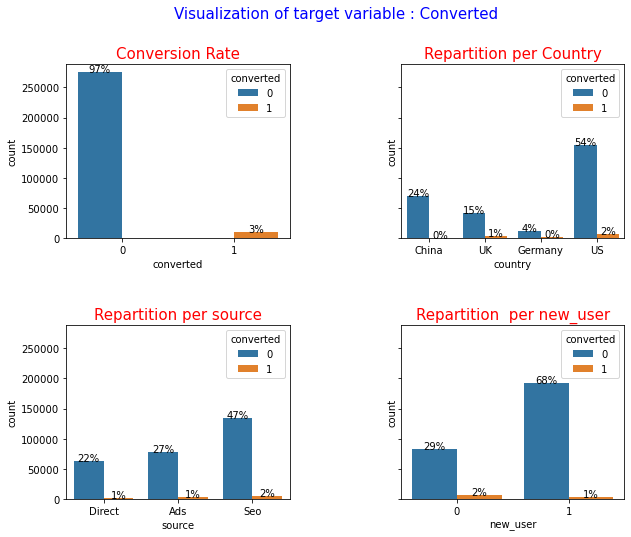

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=False, sharey=True, )
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle("Visualization of target variable : Converted", fontsize=15, color='b')

sns.countplot(data =data, x ="converted", hue="converted", ax = ax[0, 0])
ax[0,0].set_title("Conversion Rate",fontsize=15, color='r')

sns.countplot(data =data, x ="country", hue="converted", ax = ax[0, 1])
ax[0,1].set_title("Repartition per Country",fontsize=15, color='r')

sns.countplot(data =data, x ="source",  hue="converted", ax = ax[1, 0])
ax[1,0].set_title("Repartition per source",fontsize=15, color='r')

sns.countplot(data =data, x ="new_user",  hue="converted", ax = ax[1, 1])
ax[1,1].set_title("Repartition  per new_user", fontsize=15, color='r')

for i in range(2):
    for j in range(2):
        for p in ax[i, j].patches:
          total = float(len(data))
          height = p.get_height()
          ax[i,j].text(p.get_x()+p.get_width()/2.,
          height + 3, '{0:.0%}'.format(height/total), ha="center")
plt.show()

REPARTITION PER AGE

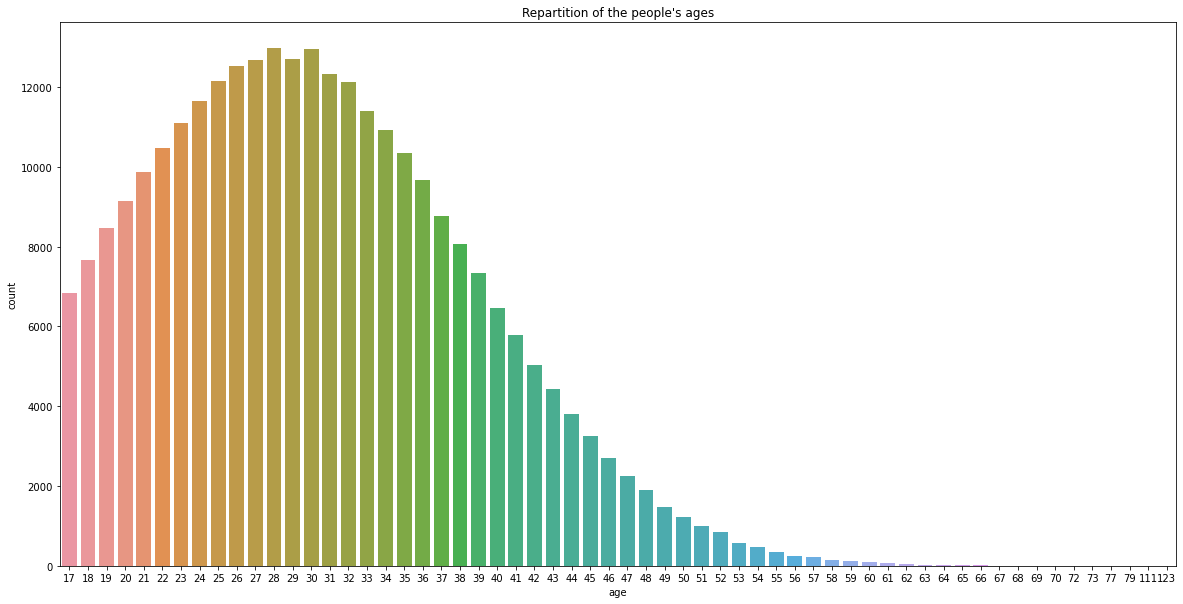

In [12]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = data["age"]);
ax.set_ylabel("count")
ax.set_title("Repartition of the people's ages")
plt.show();

CONVERTED BY AGE

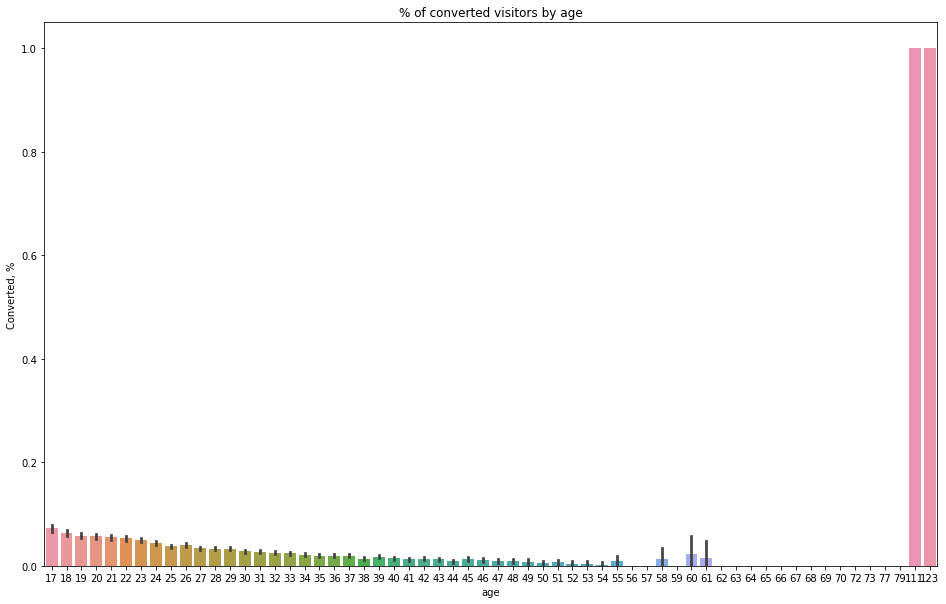

In [13]:
plt.figure(figsize=(16,10))
sns.barplot(x='age',
            y='converted',
            data=data,
           )
plt.ylabel('Converted, %')
plt.title('% of converted visitors by age')
plt.show();

Total page visited

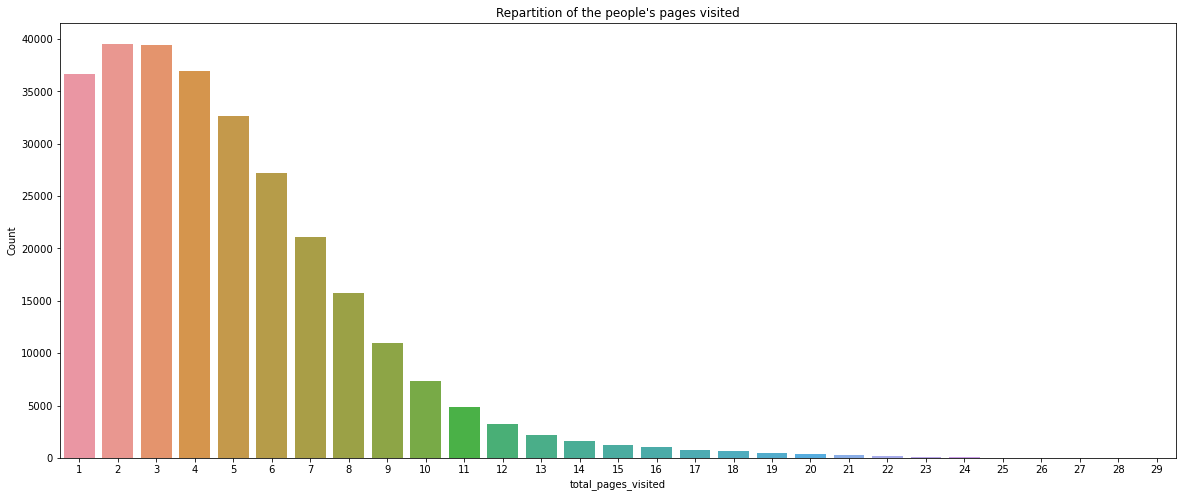

In [14]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x = data["total_pages_visited"]);
ax.set_ylabel("Count")
ax.set_title("Repartition of the people's pages visited")
plt.show();

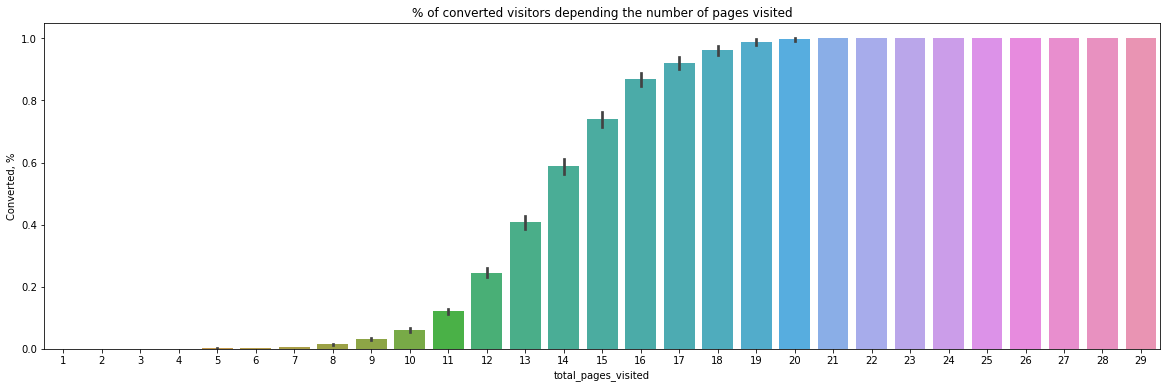

In [15]:
plt.figure(figsize=(20,6))
sns.barplot(x='total_pages_visited',
            y='converted',
            data=data,
           )

plt.ylabel('Converted, %')
plt.title('% of converted visitors depending the number of pages visited')
plt.show();

# MODELE TRAINING

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

# Dataset with all

In [16]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [17]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [18]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [19]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[4]
 [8]
 [2]
 [3]
 [4]]
[[7]
 [5]]

[0 0 0 0 0]
[0 0]


## Training pipeline

In [20]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [21]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [22]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [23]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [24]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [25]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855423


In [26]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

# Dataset without outlier and normalize

In [27]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [28]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [29]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33326238]
 [ 0.03879562]
 [-1.15919229]
 [ 0.3382926 ]
 [-0.56019834]]


In [30]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


Modélisation des données

# Dataset without outlier and normalize

In [31]:
data = pd.read_csv('conversion_data_train.csv')

In [32]:
# Création de la variable cible
Y = data.converted

In [33]:
# Création des variables explicatives
X = data.iloc[:,:-1]

In [34]:
# Encodage des variables catégoriques
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,22,1,2,0,0,0,1,0
1,21,1,3,0,1,0,0,0
2,20,0,14,1,0,0,0,1
3,23,1,3,0,0,1,0,1
4,28,1,3,0,0,1,1,0


In [35]:
# Création des datasets d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 42)

In [36]:
# Normalisation des variables explicatives
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [37]:
# Entraînement du modèle 
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [38]:
# Prédictions sur les données d'entraînement
Y_train_pred = classifier.predict(X_train)

In [39]:
# Prédictions sur les données de test
Y_test_pred = classifier.predict(X_test)

In [40]:
# Performances du modèle
print("Accuracy on train set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on train set :  0.9863608525847615
Accuracy on test set :  0.9858856326282006


In [41]:
# Matrices de confusion
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[192061    733]
 [  1984   4428]]

Confusion matrix on test set : 
[[82275   331]
 [  874  1894]]



Text(0.5, 1.0, 'Confusion Matrix')

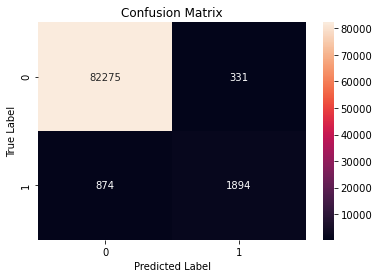

In [42]:
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot = True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [43]:
# Cross-validation k-fold

X = np.append(X_train,X_test,axis = 0)
Y = np.append(Y_train,Y_test)

scores = cross_val_score(classifier, X, Y, cv=5)
predictions = cross_val_predict(classifier, X, Y, cv=5)

print(scores)

NameError: name 'cross_val_score' is not defined


Dataset without outlier and normalize

In [ ]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(Y_test, Y_test_pred))

## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**